In [1]:
# Load required packages
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# step 1 : read the google trend csv - saved in same folder
google_trend = pd.read_csv('multiTimeline.csv', skiprows = 2)



In [3]:
# format database
google_trend['climate change: (Worldwide)'] = pd.to_numeric(google_trend['climate change: (Worldwide)'])
google_trend['pct_change'] = google_trend['climate change: (Worldwide)'].pct_change().dropna()

In [4]:
google_trend.head()

,Month,climate change: (Worldwide),pct_change
0,2008-01,18,NaN
1,2008-02,12,-0.333333
2,2008-03,19,0.583333
3,2008-04,21,0.105263
4,2008-05,30,0.428571


<Axes: xlabel='Month'>

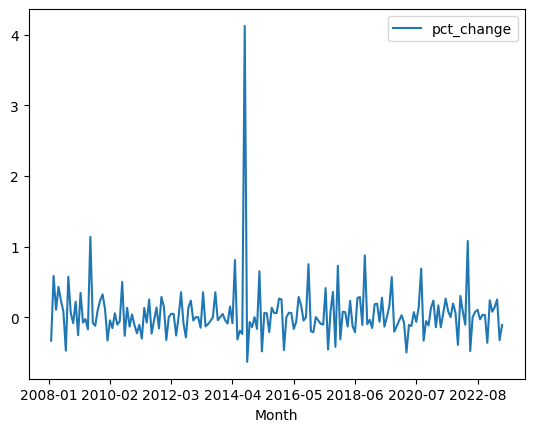

In [5]:
google_trend.plot(x = 'Month', y = 'pct_change')
# why is there a spike in 2014 ?

In [6]:
# step 2 : get stock prices with industry classification - only want these rows
ff_data = pd.read_csv('30_Industry_Portfolios.CSV', skiprows=11,nrows=1162,index_col=0)

In [7]:
ff_data

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.56,-5.19,1.29,2.93,10.97,-0.48,8.08,1.77,8.14,0.39,...,0.83,9.22,2.06,7.70,1.91,-23.79,0.07,1.87,-0.02,5.20
192608,2.59,27.03,6.50,0.55,10.01,-3.58,-2.51,4.25,5.50,7.97,...,2.17,2.02,4.39,-2.38,4.85,5.39,-0.75,-0.13,4.47,6.76
192609,1.16,4.02,1.26,6.58,-0.99,0.73,-0.51,0.69,5.33,2.30,...,2.41,2.25,0.19,-5.54,0.07,-7.87,0.25,-0.56,-1.61,-3.86
192610,-3.06,-3.31,1.06,-4.76,9.47,-4.68,0.12,-0.57,-4.76,1.00,...,-0.11,-2.00,-1.09,-5.08,-2.61,-15.38,-2.20,-4.11,-5.51,-8.49
192611,6.35,7.29,4.55,1.66,-5.80,-0.54,1.87,5.42,5.20,3.10,...,1.63,3.77,3.64,3.84,1.61,4.67,6.52,4.33,2.34,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202212,-2.23,-4.15,1.87,-5.85,-7.63,0.77,-0.33,-1.73,-6.27,-0.89,...,-6.76,-6.68,-9.07,-4.09,-7.66,-5.63,-8.97,-6.82,-5.49,-3.06
202301,-1.69,-3.57,1.46,18.54,11.46,-0.36,9.23,-1.02,9.19,15.91,...,13.45,9.76,9.81,3.27,8.55,6.89,10.92,10.48,6.46,1.74
202302,-1.79,0.20,-3.36,-4.40,-4.46,-2.74,-5.97,-4.30,-4.52,-12.89,...,-6.57,-1.90,1.44,-4.73,-0.39,-0.33,-5.52,-1.98,-2.87,-1.77
202303,3.75,4.16,0.11,2.63,-3.85,5.12,4.08,2.53,-3.54,-5.74,...,-0.14,9.99,9.79,0.13,-0.64,0.60,3.64,3.18,-8.44,1.68


In [8]:
ff_data.index = pd.to_datetime(ff_data.index, format='%Y%m')



In [9]:
start_date = "2008-02-01"
end_date = "2023-04-01"

ff_data = ff_data.loc[start_date:end_date]

In [10]:
ff_data

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2008-02-01,3.02,1.12,-2.86,-5.89,-9.05,0.07,-4.20,-0.91,4.31,-1.73,...,-3.68,-5.87,-1.74,-3.45,-4.00,-2.18,-6.14,-0.47,-10.81,-3.84
2008-03-01,0.75,3.75,0.01,-1.98,-5.38,3.57,3.77,-1.80,-1.56,-0.89,...,-0.20,0.06,0.36,-0.57,2.81,-2.06,2.56,2.96,-3.83,6.55
2008-04-01,3.13,-2.71,-9.57,-0.86,2.08,-3.45,2.38,0.42,9.47,7.96,...,4.64,6.87,6.81,-0.79,5.62,1.31,5.90,4.69,5.62,-7.15
2008-05-01,2.16,1.44,10.32,-0.57,1.04,0.13,3.73,1.63,3.33,-2.24,...,4.86,4.42,6.15,2.28,3.69,7.02,0.19,-1.29,-4.09,-2.30
2008-06-01,-8.15,-5.01,-6.61,-19.36,-11.38,-7.90,-12.48,-3.00,-4.60,-15.09,...,-10.95,-7.79,-9.75,-13.26,-10.05,-7.24,-8.18,-10.01,-17.42,-11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-2.23,-4.15,1.87,-5.85,-7.63,0.77,-0.33,-1.73,-6.27,-0.89,...,-6.76,-6.68,-9.07,-4.09,-7.66,-5.63,-8.97,-6.82,-5.49,-3.06
2023-01-01,-1.69,-3.57,1.46,18.54,11.46,-0.36,9.23,-1.02,9.19,15.91,...,13.45,9.76,9.81,3.27,8.55,6.89,10.92,10.48,6.46,1.74
2023-02-01,-1.79,0.20,-3.36,-4.40,-4.46,-2.74,-5.97,-4.30,-4.52,-12.89,...,-6.57,-1.90,1.44,-4.73,-0.39,-0.33,-5.52,-1.98,-2.87,-1.77
2023-03-01,3.75,4.16,0.11,2.63,-3.85,5.12,4.08,2.53,-3.54,-5.74,...,-0.14,9.99,9.79,0.13,-0.64,0.60,3.64,3.18,-8.44,1.68


In [11]:
# google trend data is until June, we only need up till Apr - and skip first row (NA pct change)
google_trend_filtered = google_trend.iloc[1:184, :]
google_trend_filtered

,Month,climate change: (Worldwide),pct_change
1,2008-02,12,-0.333333
2,2008-03,19,0.583333
3,2008-04,21,0.105263
4,2008-05,30,0.428571
5,2008-06,37,0.233333
...,...,...,...
179,2022-12,21,-0.363636
180,2023-01,26,0.238095
181,2023-02,28,0.076923
182,2023-03,32,0.142857


In [12]:
# Using linear regression, we get the beta of each industry to the change in news search, which is a proxy to measure exposures
ind_beta = dict()
for i in enumerate(ff_data.columns):
    model = stats.linregress(google_trend_filtered['pct_change'],ff_data.iloc[:,i[0]].astype(float))
    beta = model.slope
    ind_beta[i[1]] = beta

# sort from highest to lowest
sorted_keys = sorted(ind_beta, key = ind_beta.get, reverse = True)
sorted_ind = {}

for k in sorted_keys:
    sorted_ind[k] = ind_beta[k]
    print('The beta for ' + k , 'is ', sorted_ind[k])

The beta for Clths is  0.7454302297335091
The beta for Trans is  0.2057741538806065
The beta for Beer  is  -0.03115205652862765
The beta for Meals is  -0.15960654489162088
The beta for Hshld is  -0.2372420075388147
The beta for Smoke is  -0.3841862237688439
The beta for Fin   is  -0.3875529628808647
The beta for Whlsl is  -0.5121651153645912
The beta for Food  is  -0.6041804287502135
The beta for Rtail is  -0.7130830719230586
The beta for Other is  -0.7304581512137999
The beta for Carry is  -0.7600705992494274
The beta for Hlth  is  -0.7760909284402385
The beta for Telcm is  -0.8075236039856789
The beta for Paper is  -0.912517234880459
The beta for ElcEq is  -0.9941135755013897
The beta for Servs is  -1.0043397665995977
The beta for Chems is  -1.1117152373841899
The beta for Steel is  -1.208806479221936
The beta for Txtls is  -1.2094826308315492
The beta for Util  is  -1.2163017193991783
The beta for Cnstr is  -1.2972666689150762
The beta for BusEq is  -1.3035748276030035
The beta for 